# Analyzing Marketing Campaign  Results using Pandas

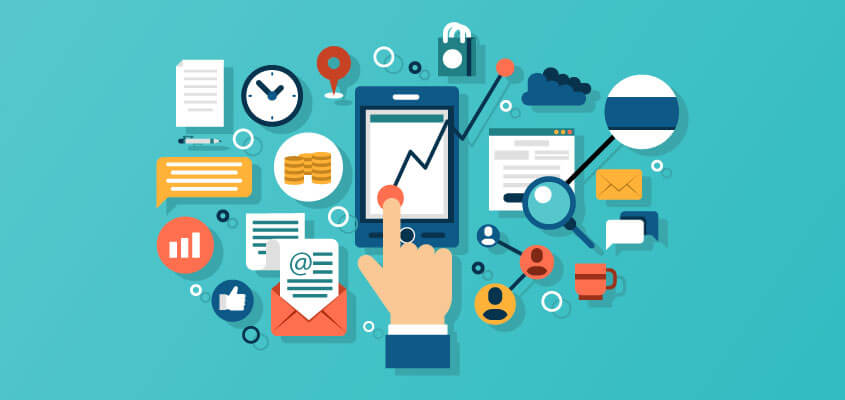


Effective marketing campaigns hinge on understanding customer preferences and tailoring communication accordingly. In this data analysis project, our objective is to delve into the results of a recent marketing campaign to glean insights into factors influencing its success.

### Brief Description of our Data

Our dataset consists of 12 columns offering a rich dataset for analyzing marketing campaign performance. Here's a breakdown of the potential insights you can glean from each column:

* `user_id`: Unique identifier for each user.
* `date_served`: Date when the user was served the marketing material.
* `marketing_channel`: Channel through which the marketing material was delivered.
* `variant`: Different versions or variants of the marketing material.
* `converted`: Indicates whether the user converted as a result of the marketing campaign.
* `language_displayed`: Language in which the marketing material was displayed to the user.
* `language_preferred`: Language preferred by the user.
* `age_group`: Age group of the user.
* `date_subscribed`: Date when the user subscribed (if applicable).
* `date_canceled`: Date when the subscription was canceled (if applicable).
* `subscribing_channel`: Channel through which the user subscribed.
* `is_retained`: Indicates whether the user was retained after subscribing.


In [1]:
# Import the needed modules into the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import marketing.csv 
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [2]:
# Showing the dataset size
marketing.shape

(10037, 12)

In [3]:
# Print the statistics of all columns
marketing.describe()

C:\Users\uosur\AppData\Local\Temp\ipykernel_13580\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\uosur\AppData\Local\Temp\ipykernel_13580\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\uosur\AppData\Local\Temp\ipykernel_13580\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [4]:
# Check column data types and non-missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [5]:
marketing['is_retained'] = marketing['is_retained'].fillna(False)
marketing['converted'] = marketing['converted'].fillna(False)
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
marketing['converted'] = marketing['converted'].astype('bool')

# Check the data types after modification
marketing['is_retained'].dtypes, marketing['converted'].dtypes

(dtype('bool'), dtype('bool'))

In [6]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

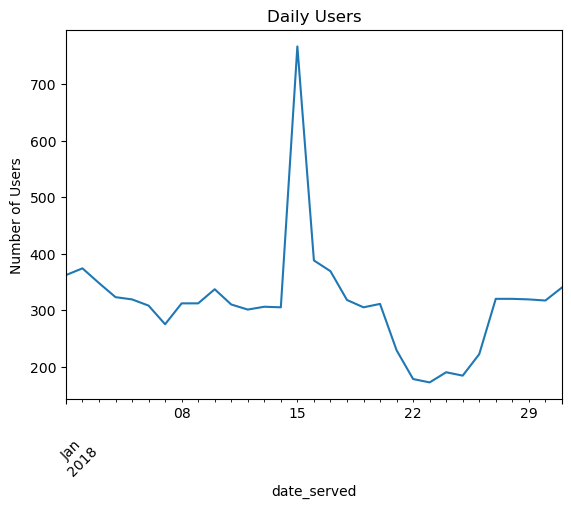

In [7]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily Users')
plt.ylabel('Number of Users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Calculating Conversion Rate


On marketing teams, ***Conversion Rate*** is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

It is the percentage of the users who saw our marketing assets and subsequently became subscribers.

The formula for conversion rate is:

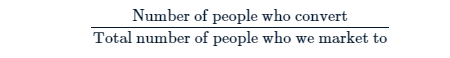

In [8]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print('Overall Conversion Rate',round(conversion_rate*100, 2), "%")

Overall Conversion Rate 13.89 %


### Calculating retention rate

***Retention Rate*** is the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

***Conversion Rate*** and ***Retention Rate*** function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.

The formula for retention rate is:

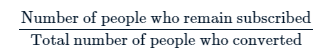



In [9]:
# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/subscribers
print('Overall Conversion Rate',round(retention_rate*100, 2), "%")

Overall Conversion Rate 66.8 %


Let's determine how effective the campaign was on converting English speakers.

In [10]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


Next, we want to look at the conversion rate by the language that the marketing asset was shown in. While many of our users speak English, some prefer another language. Let's check to make sure marketing material was translated well across languages.

We can optimally do this using ***pandas groupby()*** method

In [11]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')['user_id'].nunique()


# Calculate the conversion rate for all languages
language_conversion_rate = round(subscribers/total*100,2)
language_conversion_rate

language_displayed
Arabic     50.00
English    12.92
German     71.62
Spanish    20.00
Name: user_id, dtype: float64

We might want to know whether there is any difference in the conversion rate based on when in the month, our users saw an ad. We will practice ***groupby()*** again, this time looking at how metrics have evolved.

In [12]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = round(subscribers/total*100,2)
daily_conversion_rate

date_served
2018-01-01     9.94
2018-01-02     9.89
2018-01-03    10.34
2018-01-04    10.84
2018-01-05    12.54
2018-01-06    11.36
2018-01-07    14.18
2018-01-08    11.54
2018-01-09    12.50
2018-01-10    11.87
2018-01-11     8.06
2018-01-12     7.64
2018-01-13     8.50
2018-01-14     8.52
2018-01-15    11.34
2018-01-16    25.52
2018-01-17    21.95
2018-01-18     9.12
2018-01-19     5.90
2018-01-20     6.75
2018-01-21     8.73
2018-01-22    12.36
2018-01-23    12.21
2018-01-24    11.58
2018-01-25    12.50
2018-01-26     9.01
2018-01-27     6.56
2018-01-28     6.25
2018-01-29     5.96
2018-01-30     6.62
2018-01-31     5.29
Name: user_id, dtype: float64

### Visualize conversion rate by language

While the *language_conversion_rate* table provided useful information, it is much easier to compare relative conversion rates visually.

It is critical for data scientists to communicate results clearly to business stakeholders. A strong foundation in data visualization is a key aspect to conveying results, especially when engaging with people who are not as comfortable interpreting data on their own.


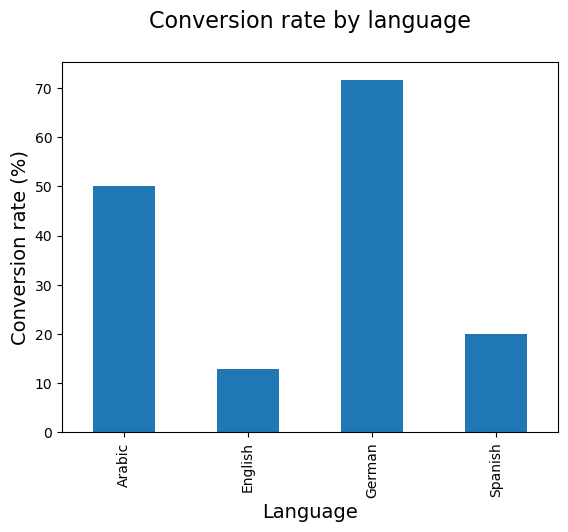

In [13]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size =16)
plt.xlabel('Language', size =14)
plt.ylabel('Conversion rate (%)', size =14)

# Display the plot
plt.show()

### Setting up our data to visualize daily conversion

When we want to understand how our campaign performed, it is essential to look at how key metrics changed throughout the campaign. Our key metrics can help us catch problems that may have happened during the campaign, such as a bug in the checkout system that led to a dip in conversion toward the end of our campaign. Metrics over time can also surface trends like gaining more subscribers over the weekends or on specific holidays.

In [14]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']
daily_conversion_rate.head()

,date_served,conversion_rate
0,2018-01-01,9.94
1,2018-01-02,9.89
2,2018-01-03,10.34
3,2018-01-04,10.84
4,2018-01-05,12.54


### Visualize daily conversion rate

Now that we've formatted the data into a more manageable format for visualization, let's proceed to create a line chart. Strong visualization skills are crucial for a data scientist because it will allow you and your marketing stakeholders to derive deeper insights from the data. In this case, creating a line plot will make it much easier to notice peaks and valleys in our conversion rate over time as well as any overall trends.

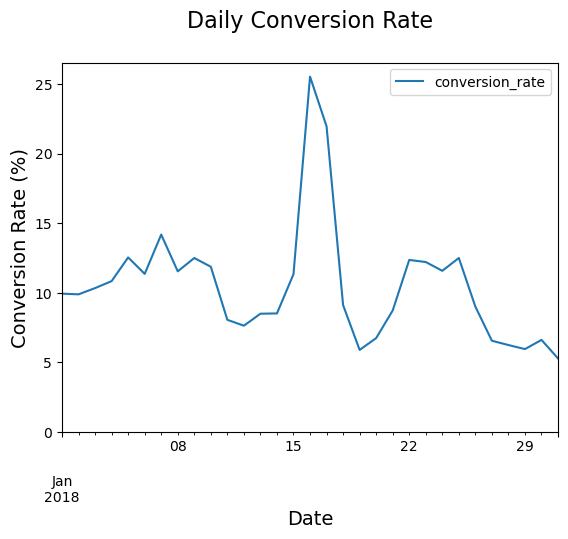

In [15]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily Conversion Rate\n', size = 16)
plt.ylabel('Conversion Rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

### Marketing channels across age groups

Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that we will effectively communicate our findings to the stakeholders.

Let's create a ***grouped bar chart*** showing how many people each marketing channel reached by age group.

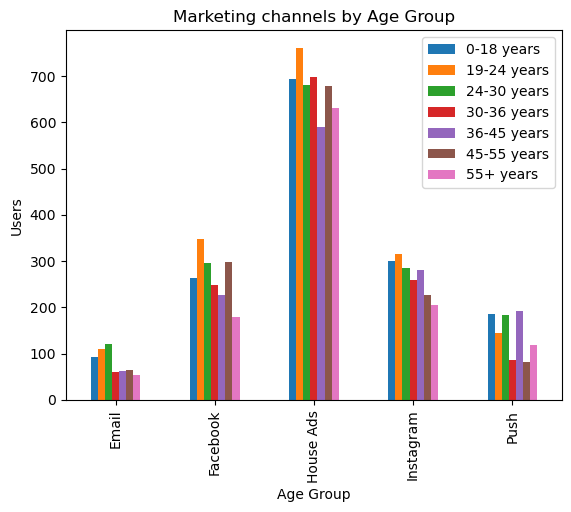

In [16]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)

plt.show()

### Building a conversion function

Since we've been doing a lot of repetitive calculations in our work, let's consider automation. We already are aware of the format of the marketing DataFrame, we also know it will remain the same over time, we can build a function to enable us to calculate conversion rate across any sub-segment we want on the fly.

In [17]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and visualize conversion function

We've done the hard work of building our conversion rate function. Now it's time to test it out! Automating our analyses can be time-consuming up front, but this is where it all pays off.

Let's see how quickly we can calculate the conversion rate.

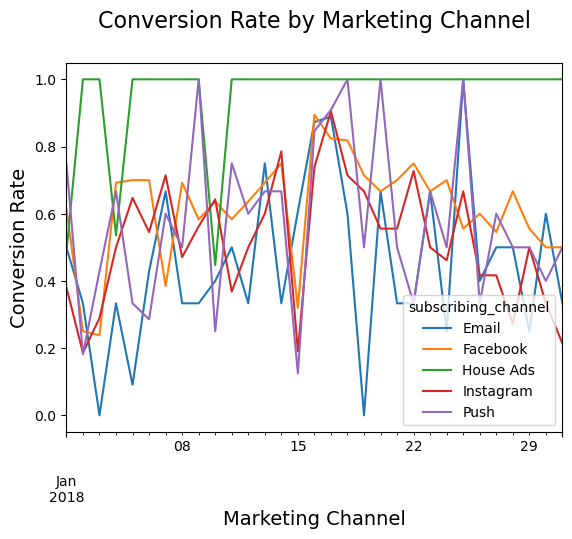

In [18]:
# Calculate conversion rate by marketing_channel
marketing_channel_conv = conversion_rate(marketing, ['date_served','subscribing_channel'])
#print(age_group_conv)

# Unstack and create a DataFrame
marketing_channel_df = pd.DataFrame(marketing_channel_conv.unstack(level=1))

# Visualize conversion by age_group
marketing_channel_df.plot()
plt.title('Conversion Rate by Marketing Channel\n', size = 16)
plt.ylabel('Conversion Rate', size = 14)
plt.xlabel('Marketing Channel', size = 14)
plt.show();

### Building plotting function for daily performance

Now that we've looked at conversion rate by several metrics, we want to see if that trend has changed over time. Marketing has been changing their strategy and wants , for example, to make sure that their new method isn't alienating *age groups* that are less comfortable with their product. However, to do so, we need to create a plotting function to make it easier to visualize the results. We'll make sure we visualize our results with a separate plot for each important unique value.

In [19]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        #plt.figure(figsize=(10,6))
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion Rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()
        plt.clf()

### Putting it all automated together

Let's show our marketing stakeholders a report of the daily *conversion rate* for each *age group*. They might need to refresh this report on a monthly cadence. It will a perfect opportunity to utilize our functions. Not only for today, but they will also help each month when it's time for a refresh of the data.

So, let's apply our two functions on the ***age_group***

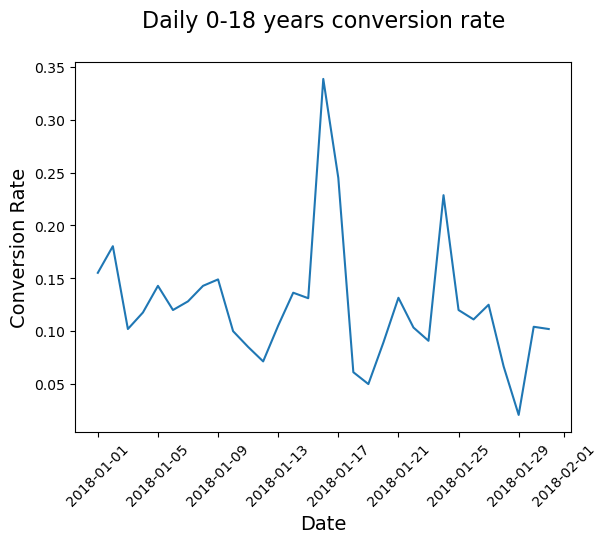

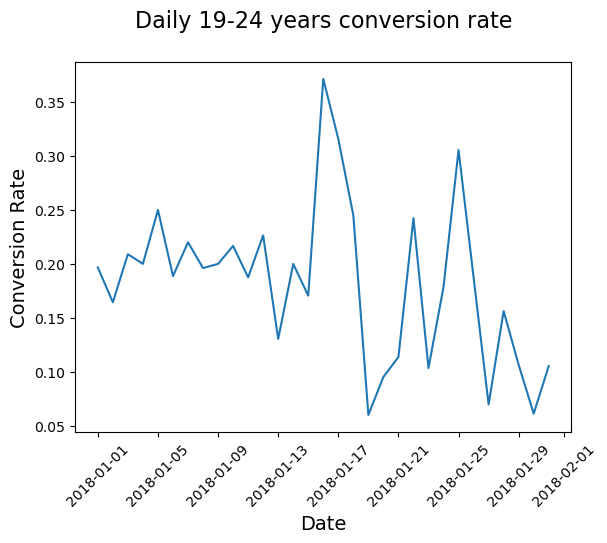

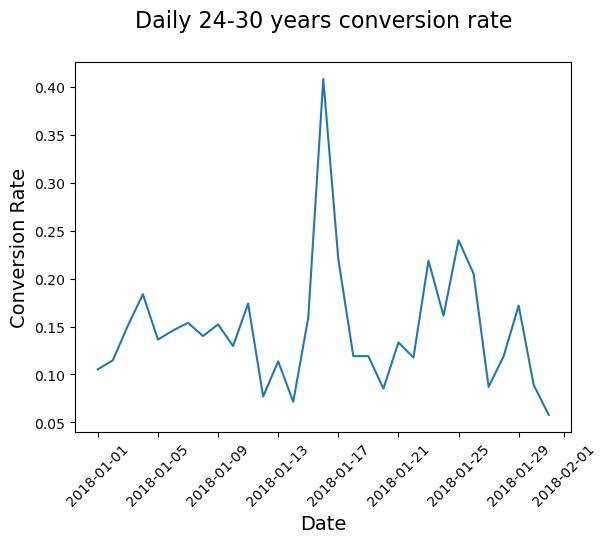

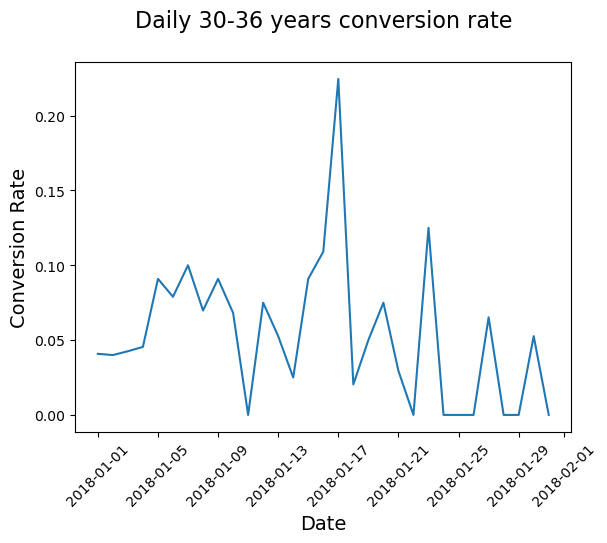

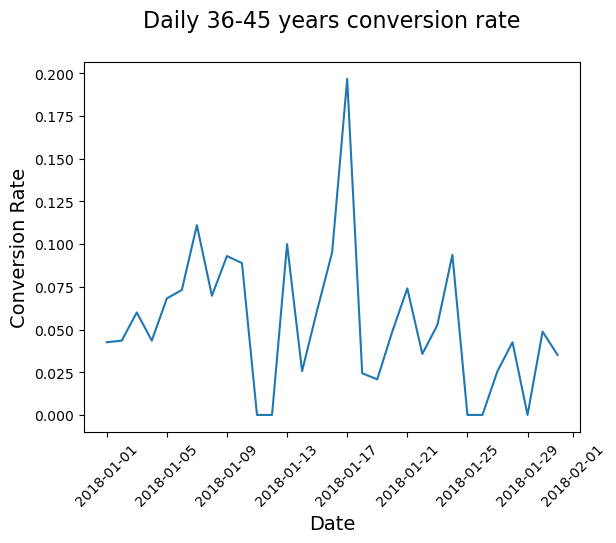

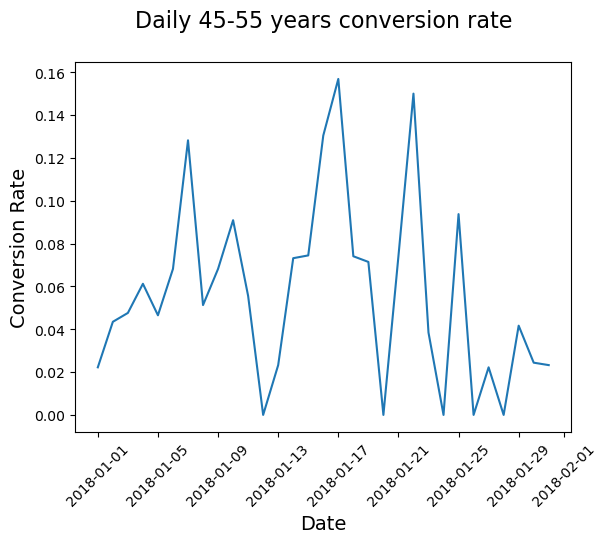

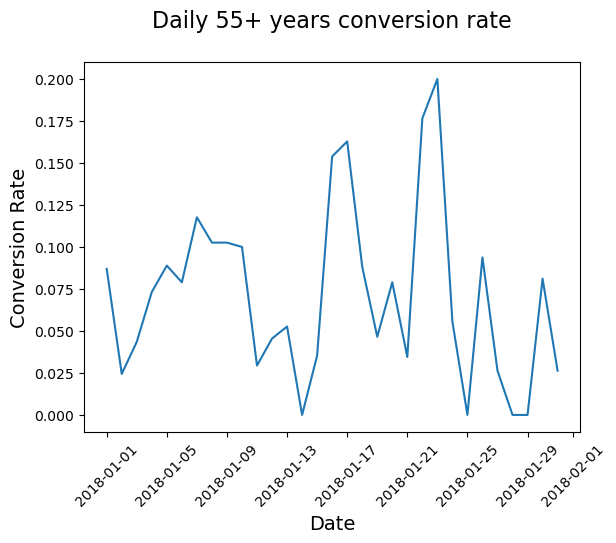

<Figure size 640x480 with 0 Axes>

In [20]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

Let's do the same for the ***marketing_channel***

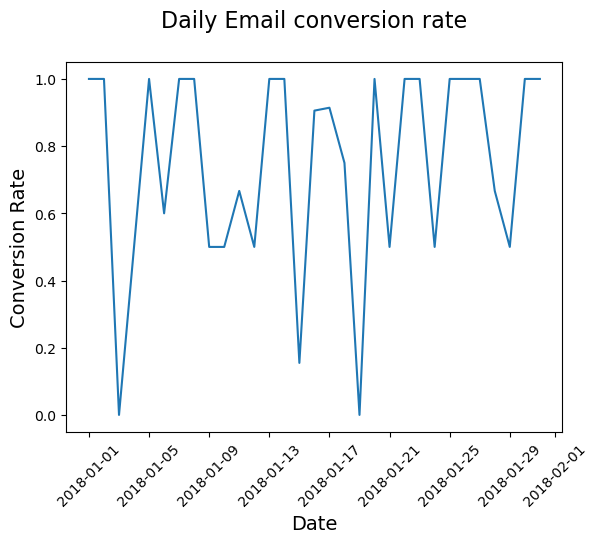

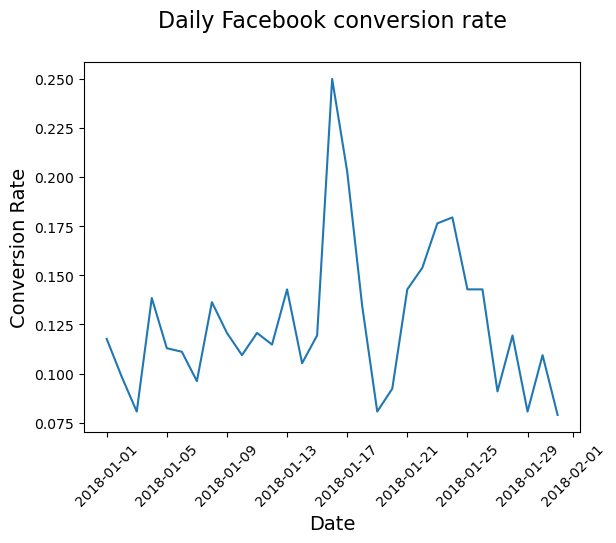

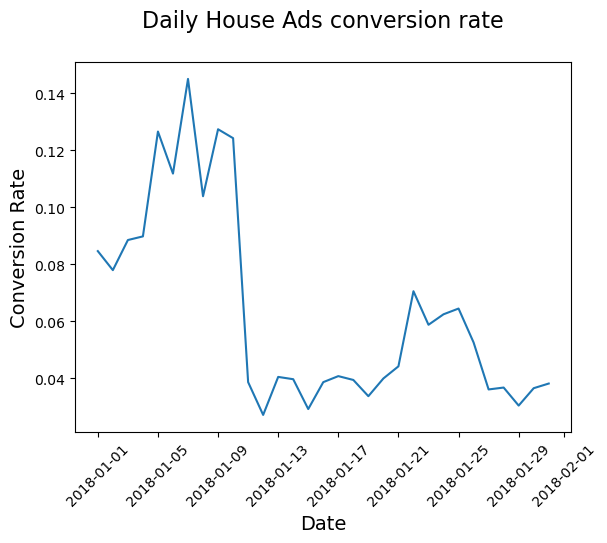

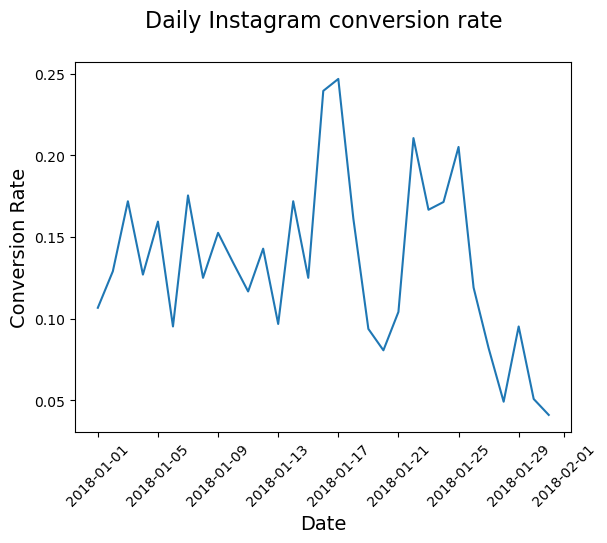

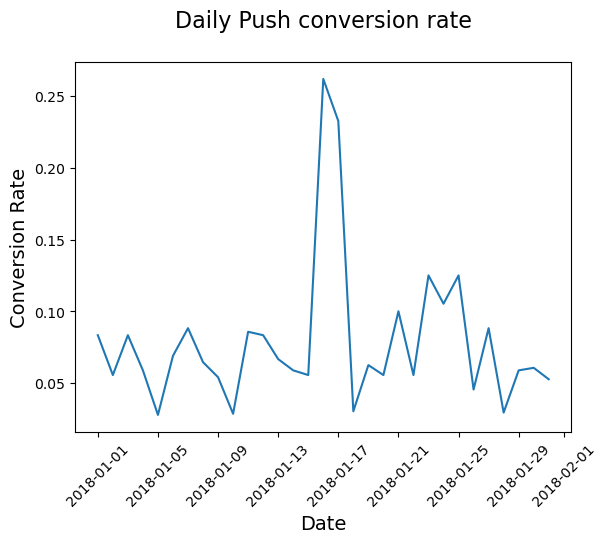

<Figure size 640x480 with 0 Axes>

In [21]:
# Calculate conversion rate by date served and marketing channel
marketing_channel_conv = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack age_group_conv and create a DataFrame
marketing_channel_df = pd.DataFrame(marketing_channel_conv.unstack(level=1))

# Plot the results
plotting_conv(marketing_channel_df)

### Analyzing House Ads conversion rate

Given the displayed above, the *House Ads* team, of course, should be worried about the irregularities they will notice in their conversion rate. A sudden decrease in conversion rate took place on January 11. It is common for stakeholders to come to us with concerns they've noticed around changing metrics. 

As a data scientist supporting a marketing team, it's normal to run into fluctuating metrics all the time. It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

It's our job to determine whether these changes are natural or if they require further investigation. Let's find out and identify potential causes for the decrease.

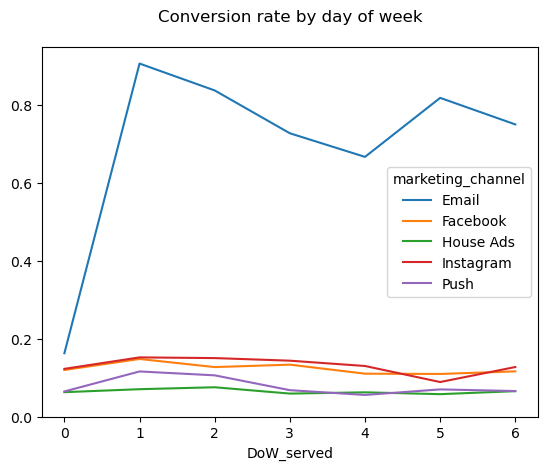

In [22]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# dt.dayofweek returns  the day of the week. 
# It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

As we can see, *Email* is particularly high and may be reflective of a tracking error, but *House Ads* appear stable across the week with a slight peak on Wednesday. Let's investigate further!

### House ads conversion by language

Now that we've ruled out natural fluctuations across the *day of the week* a user saw our marketing assets as they cause for decreasing house ads conversion, we will take a look at conversion by ***language*** over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be our job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's always our job to think creatively to identify the cause.

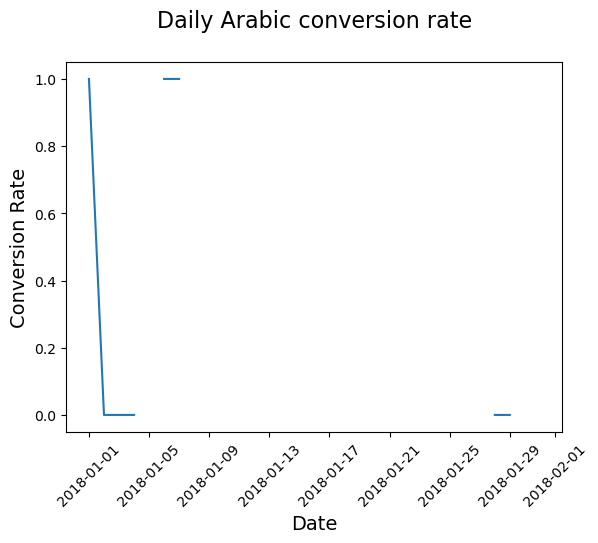

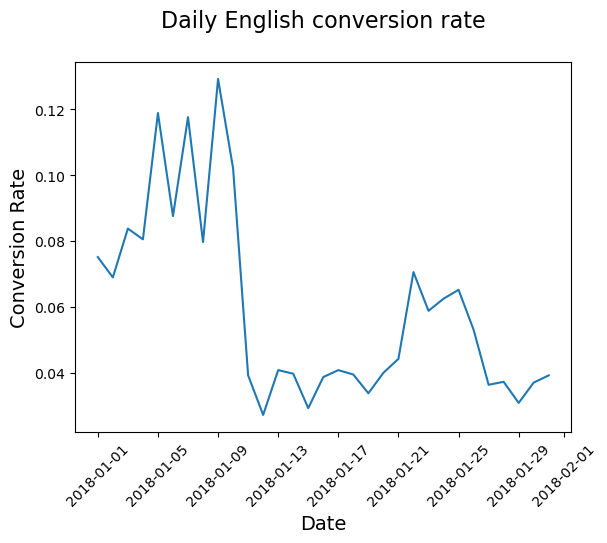

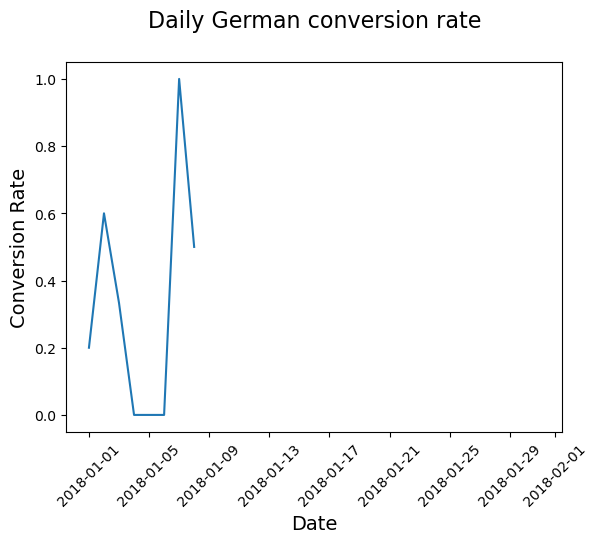

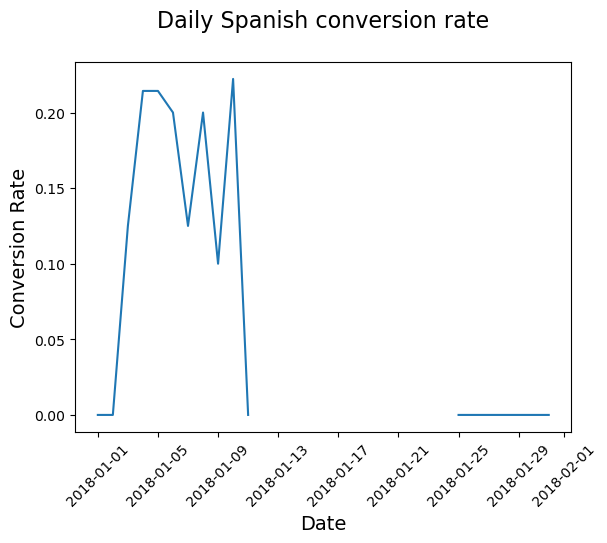

<Figure size 640x480 with 0 Axes>

In [23]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

Interesting! English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

Let's push our investigation towards the language. We'll make our double checks to see if the users received the ads in their correct preferred language.

In [24]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'],'Yes','No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\uosur\AppData\Local\Temp\ipykernel_13580\3600000253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'],'Yes','No')


### Confirming house ads error with visualization

Now that we've created a DataFrame that checks whether users see ads in the correct language let's calculate what percentage of users were not being served ads in the right language and plot your results.

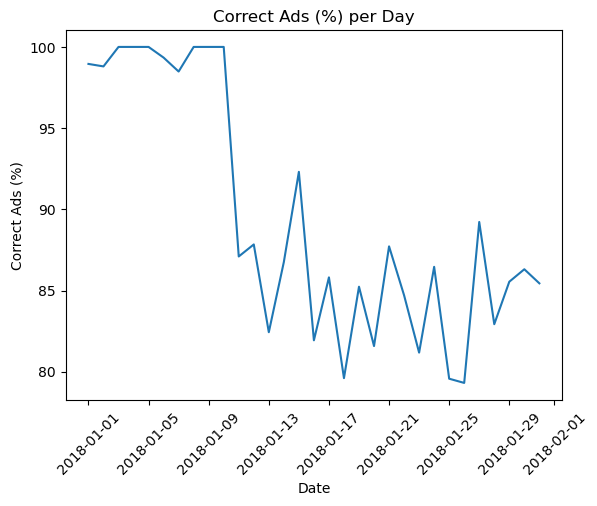

In [25]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct']*100)
plt.title('Correct Ads (%) per Day')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Correct Ads (%)')
plt.show()

### Setting up conversion indexes

Now that we've determined that *language* is, in fact, the issue with *House Ads* conversion, stakeholders would need to know how many subscribers they lost as a result of this bug.

To determine this, we will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

In [26]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, 'language_displayed')


# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Given the results, we can assess what conversion rate should have been during the rest of the month.

### Analyzing user preferences

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

Now, we will create a new DataFrame that we can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once we have the DataFrame, we can begin calculating how many subscribers we would have expected to have had the language bug not occurred.

In [27]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))

converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

In [28]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate'] * spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate'] * arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']*converted_df[('user_id','Spanish')]/100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']*converted_df[('user_id','Arabic')]/100
converted_df['expected_german_conv'] = converted_df['expected_german_rate']*converted_df[('user_id','German')]/100

#let's view our results
converted_df.loc['2018-01-11': ]

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   
2018-01-16             7.0   127.0    4.0    17.0       0.0     6.0    0.0   
2018-01-17             2.0   126.0    3.0    16.0       0.0     2.0    0.0   
2018-01-18             7.0   121.0    6.0    18.0       0.0     5.0    1.0   
2018-01-19             5.0   126.0    5.0    12.0       1.0     4.0    0.0   
2018-01-20             6.0   124.0    6.0    14.0       1.0     4.0    1.0   
2018-01-21             1.0    99.0    4.0     9.0       0.0     5.0    0.0   
2018-01-22             2.0    72.0    3.0     8.0       1.0     4.0    1.0   
2018-01-23             3.0    69.0    4.0     9.0       0.0     5.0    0.0   
2018-01-24             2.0    83.0    3.0     8.0       0.0     6.0    0.0   
2018-01-25             3.0    75.0    4.0    11.0       0.0     4.0    2.0   
2018-01-26             6.0    89.0    3.0    16.0       0.0     4.0    0.0   
2018-01-27             3.0   148.0    3.0    12.0       1.0     4.0    0.0   
2018-01-28             5.0   134.0    3.0    21.0       0.0     4.0    0.0   
2018-01-29             7.0   138.0    4.0    15.0       2.0     3.0    0.0   
2018-01-30             4.0   139.0    3.0    18.0       0.0     4.0    0.0   
2018-01-31             7.0   130.0    4.0    16.0       1.0     4.0    0.0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-11             0.0               6.0             10.091549   
2018-01-12             1.0               3.0              5.045775   
2018-01-13             0.0               5.0              8.409624   
2018-01-14             0.0               6.0             10.091549   
2018-01-15             0.0               6.0             10.091549   
2018-01-16             0.0               6.0             10.091549   
2018-01-17             4.0               2.0              3.363850   
2018-01-18             0.0               5.0              8.409624   
2018-01-19             0.0               4.0              6.727700   
2018-01-20             0.0               4.0              6.727700   
2018-01-21             0.0               5.0              8.409624   
2018-01-22             0.0               4.0              6.727700   
2018-01-23             0.0               5.0              8.409624   
2018-01-24             0.0               6.0             10.091549   
2018-01-25             0.0               4.0              6.727700   
2018-01-26             2.0               4.0              6.727700   
2018-01-27             1.0               4.0              6.727700   
2018-01-28             2.0               4.0              6.727700   
2018-01-29             0.0               3.0              5.045775   
2018-01-30             2.0               4.0              6.727700   
2018-01-31             1.0               4.0              6.727700   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-11                    30.274648            26.910798   
2018-01-12                    15.137324            13.455399   
2018-01-13                    25.228873            22.425665   
2018-01-14                    30.274648            26.910798   
2018-01-15       

Now, we are a step closer to assess how many subscribers we lost due to the language discrepancy.

### Assessing bug impact

It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information your team has, the better they will be able to evaluate this trade-off.

In [29]:
# Use only the relevant dates
converted = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
lost_subs

32.144143192488265

### Conclusion

This project demonstrates the power of data analysis in identifying areas for improvement in marketing campaigns. Our analysis revealed that language plays a crucial role in marketing campaign success. 

By leveraging customer data and focusing on language preferences, we can create more effective and targeted marketing initiatives. Also by implementing a multi-lingual approach based on customer preferences, we can significantly improve conversion rates and maximize the impact of future campaigns.

**Author**
 
**[Mohamed Wessam](https://www.linkedin.com/in/muhammad-wessam-281430102/)**, *Aspiring self-taught Data Analyst leveraging Python, SQL, and Power BI to transform data into actionable insights. Skilled in data wrangling, analysis, and crafting clear visualizations. Always eager to contribute to a data-driven team and learn from experienced professionals.*